In [23]:
# Importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading data
data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

In [29]:
df_exploded = df.explode('job_skills')
skills_count = df_exploded.groupby(["job_title_short","job_skills"]).size()
df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count = df_skills_count.sort_values(by = 'skill_count', ascending = False)

In [41]:
job_title = 'Data Scientist'
top_skills = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short']== job_title].head(top_skills)
df_skill_final

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
1101,Data Scientist,sql,78982
1070,Data Scientist,r,59566
1082,Data Scientist,sas,29534
1113,Data Scientist,tableau,29445
924,Data Scientist,aws,26256
1096,Data Scientist,spark,24286
925,Data Scientist,azure,21664
1114,Data Scientist,tensorflow,19153
968,Data Scientist,excel,17545


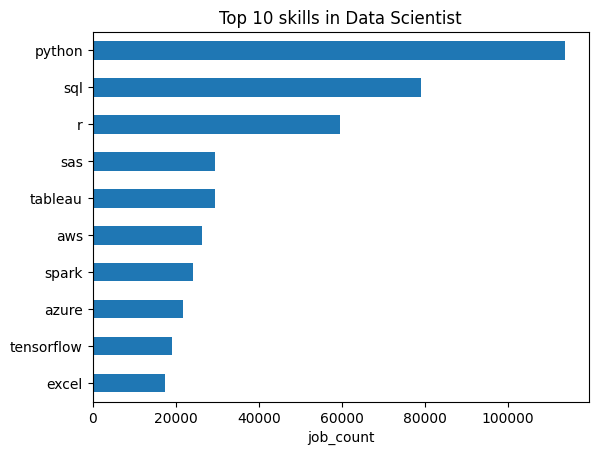

In [42]:
df_skill_final.plot(kind = 'barh', x = 'job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} skills in {job_title}')
plt.xlabel('job_count')
plt.ylabel('')
plt.legend().set_visible(False)
 
